In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('PlantVillage',shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) # beacuse this is a set of 62 batches of 32 images each

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 0 1 0 0 2 0 1 1 0 1 0 0 2 1 0 1 1 0 2 1 0 0 1 0 0 0 0 1]


Data Visualization

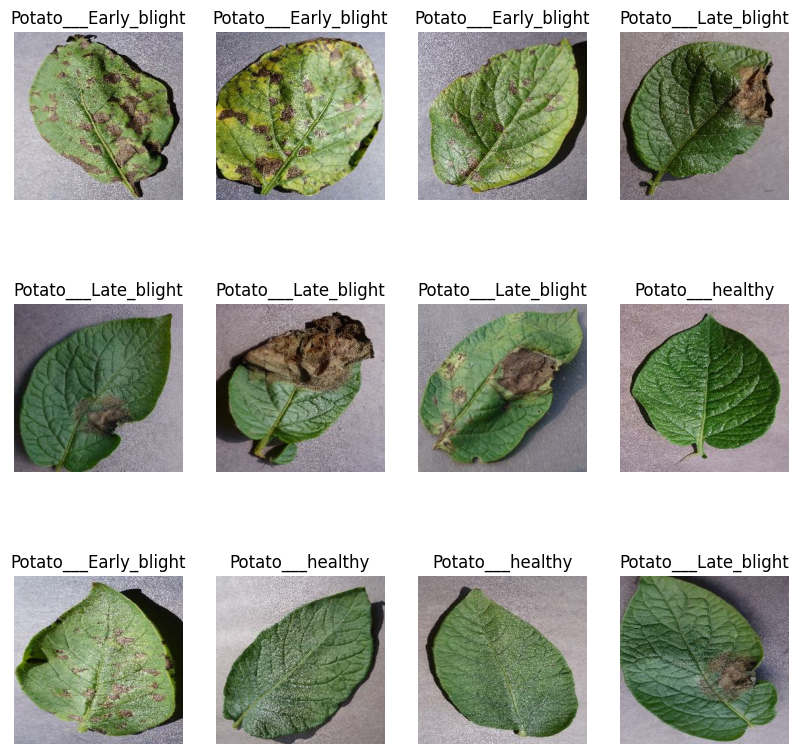

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):    
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype('uint8'))



In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [10]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [11]:
val_ds = test_ds.take(7)
test_ds = test_ds.skip(7)

In [12]:
len(train_ds), len(test_ds), len(val_ds)

(54, 7, 7)

doing all this data partition with a single function

In [13]:
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, shuffle=True,  shuffle_size=5000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [15]:
len(train_ds), len(test_ds), len(val_ds)

(54, 8, 6)

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescaling = tf.keras.Sequential([
    keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    keras.layers.Rescaling(1.0/255.0)
])

In [18]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
  ]
)

In [19]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

model = keras.Sequential([
    resize_and_rescaling,
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [35]:
history = model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/10


54/54 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9477 - loss: 0.1503 - val_accuracy: 0.8333 - val_loss: 0.5644
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9597 - loss: 0.1092 - val_accuracy: 0.8646 - val_loss: 0.3996
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9509 - loss: 0.1403 - val_accuracy: 0.9323 - val_loss: 0.1989
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.9747 - loss: 0.0706 - val_accuracy: 0.9323 - val_loss: 0.1487
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9854 - loss: 0.0577 - val_accuracy: 0.9427 - val_loss: 0.1281
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9769 - loss: 0.0649 - val_accuracy: 0.9688 - val_loss: 0.0802
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9532 - loss: 0.1274 - val_accuracy: 0.9635 - val_loss: 0.0980
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9741 - loss: 0.0915 - val_accuracy: 0.9115 - val_loss: 0.

In [36]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 566ms/step - accuracy: 0.9635 - loss: 0.0828


[0.07367342710494995, 0.96484375]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [40]:
history.history['accuracy']

[0.9502314925193787,
 0.9594907164573669,
 0.9600694179534912,
 0.9704861044883728,
 0.9814814925193787,
 0.9739583134651184,
 0.9594907164573669,
 0.9751157164573669,
 0.9751157164573669,
 0.9768518805503845]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

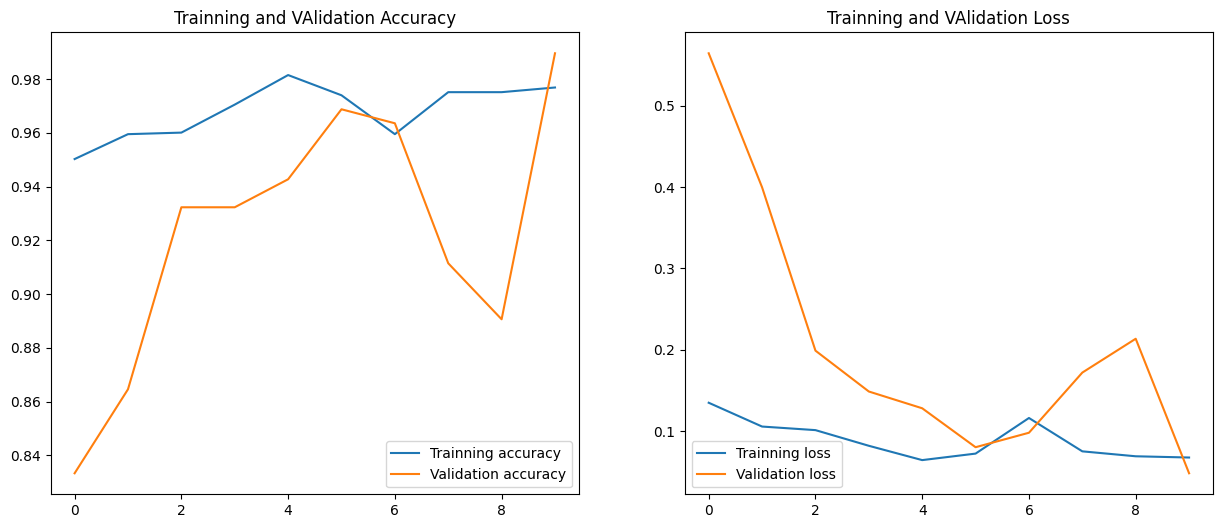

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Trainning accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Trainning and VAlidation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Trainning loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='lower left')
plt.title('Trainning and VAlidation Loss')
plt.show()

first image to predict
first image's actual label:  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
Potato___Late_blight


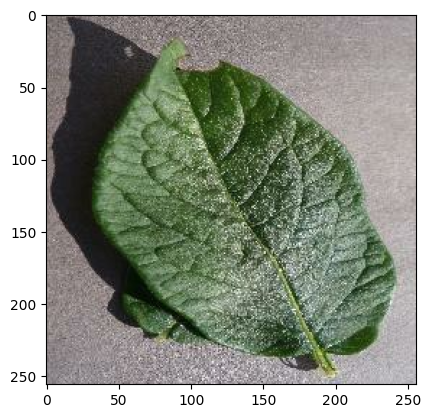

In [43]:
for image_batch, label_batch in dataset.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

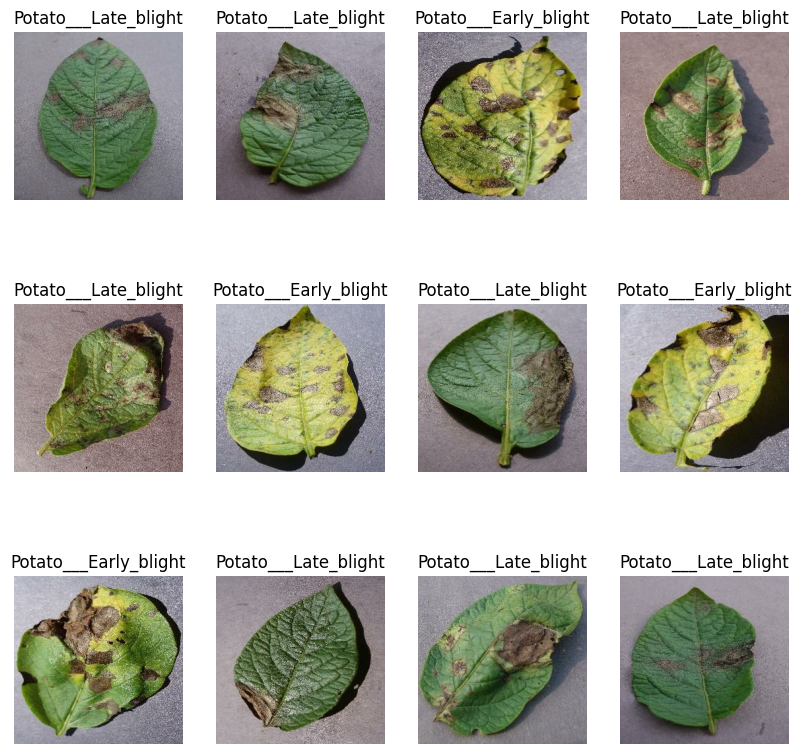

In [45]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):    
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype('uint8'))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


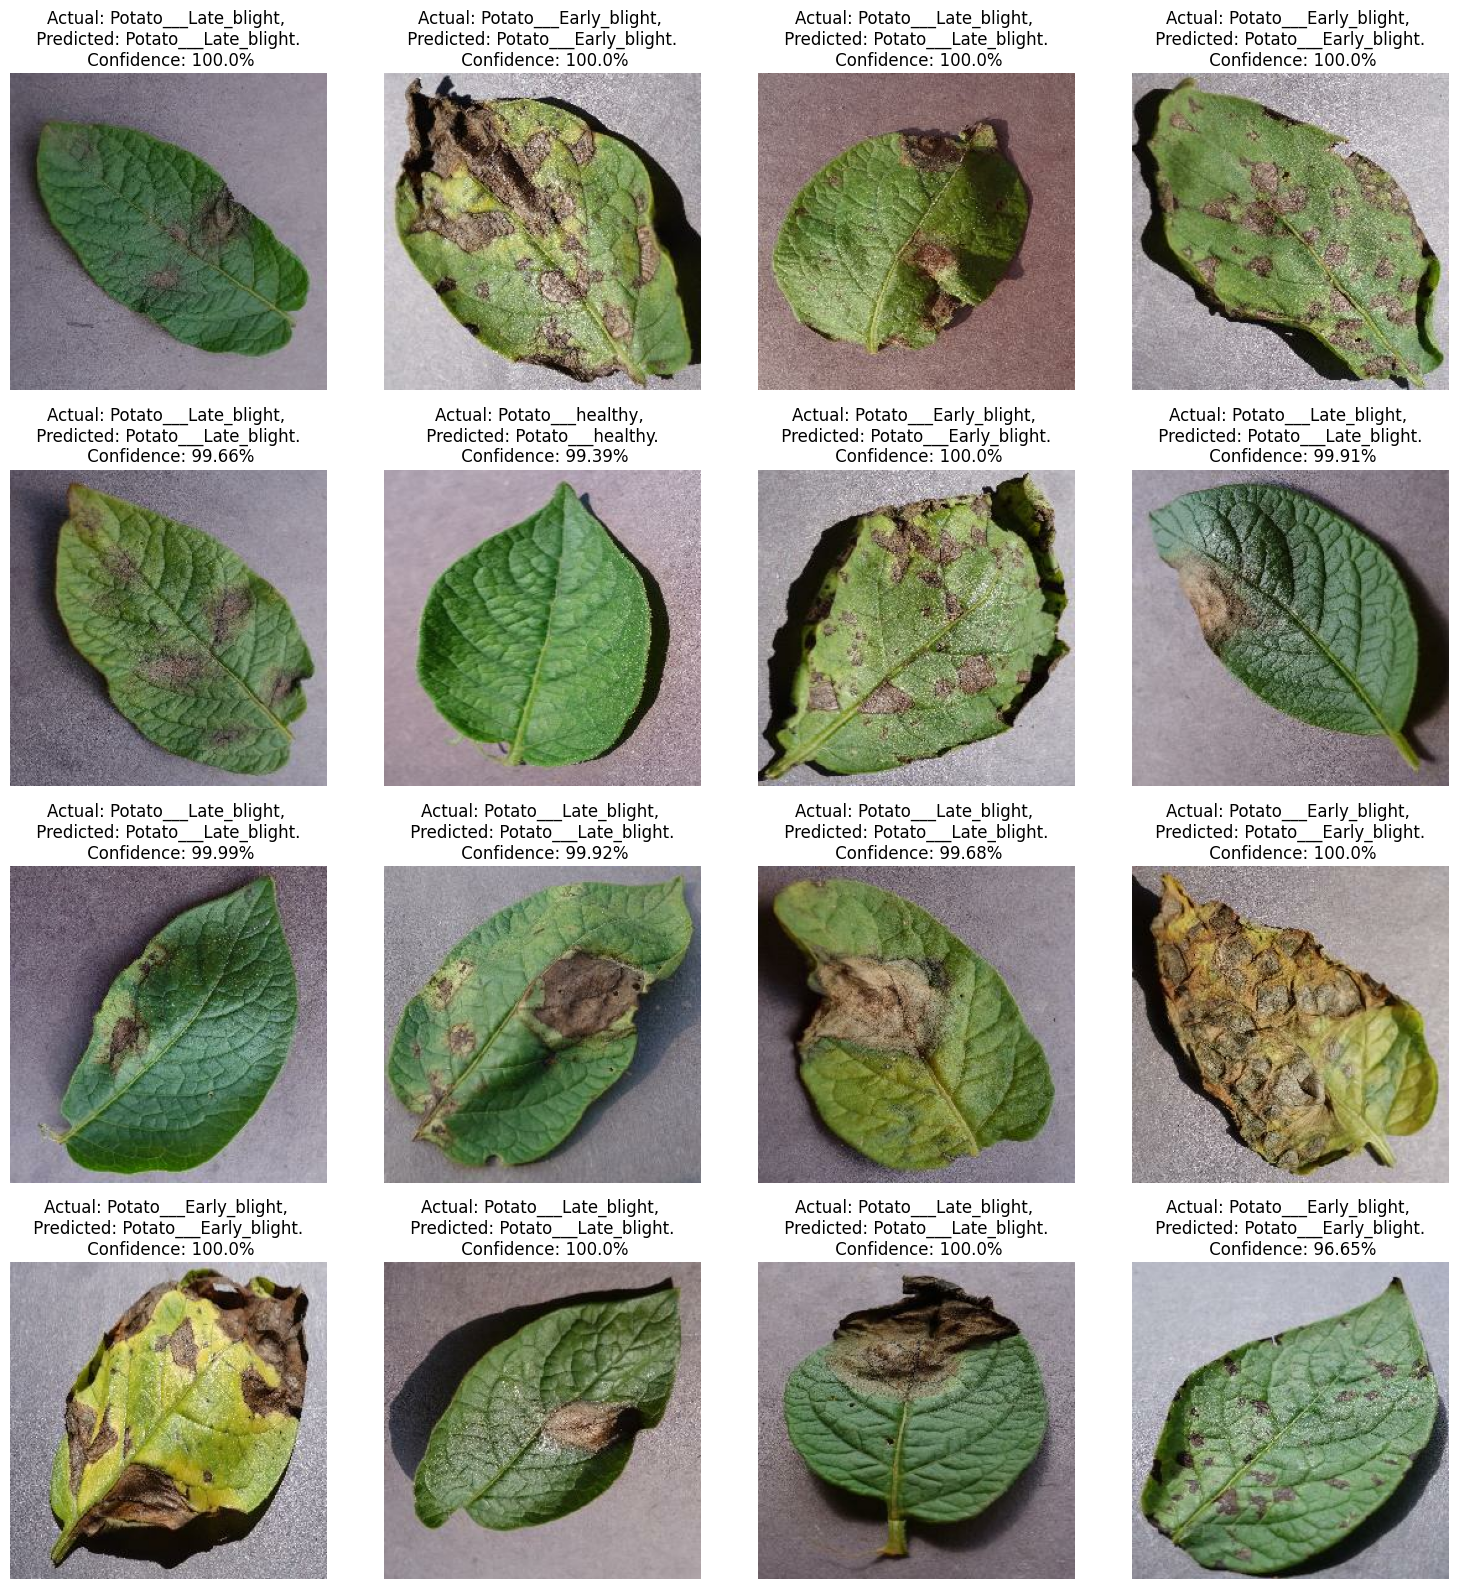

In [47]:
plt.figure(figsize=(16,16))
for images, labels in test_ds.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%')
        plt.axis('off')
        plt.tight_layout()
        


In [48]:
model.save('../models/model.keras', save_format='keras')